# STA 142A Final Project

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] 

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [4]:
path  = "C:/Users/pumad/STA142A/Final/"

bank = pd.read_csv(path + "bank/bank.csv", sep=";")
bank_full = pd.read_csv(path + "bank/bank-full.csv", sep=";")


bank_add = pd.read_csv(path + "bank-additional/bank-additional.csv", sep=";")
bank_add_full = pd.read_csv(path + "bank-additional/bank-additional-full.csv", sep=";")



In [5]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
print(bank_add.shape)
print(bank_add_full.shape)

(4119, 21)
(41188, 21)


In [7]:
# IR => Imbalanced Ratio (Size of minority class /  Size of majority class)
IR = bank_full[["y"]].value_counts()[1]/bank_full[["y"]].value_counts()[0]
print(IR)

0.1324833425179099


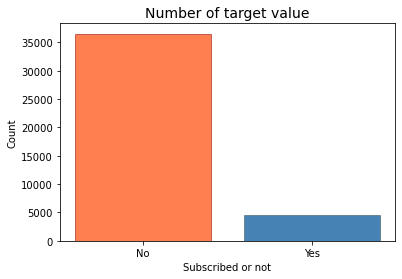

In [8]:
plt.bar(['No', 'Yes'], bank_add_full.y.value_counts().values, color=['coral', 'steelblue'], edgecolor=["darkred", "darkslategrey"],linewidth=0.5)
plt.title('Number of target value', fontsize=14)
plt.xlabel('Subscribed or not')
plt.ylabel('Count')
plt.show()

As we can clearly see on the above graph, the dataset is imbalanced. 

## Resampling Techinque

### UnderSampling

-  directly discard a subset of observations of the majority class
- may lead to loss of information as a large portion of the data from the majority class is discarded.

- Cluster-based undersampling 

- Random undersampling

### OverSampling

- increases the number of data points in the minority class from $n_0$ to $n_1$ while keeping the observations from the majority class intact

- Random Oversampling
- SMOTE(Synthetic Minority Over-sampling Technique)

### Hybrid methods

- combination of undersampling and oversampling methods

In this case, we are going to apply Oversampling method, sepcifially following SMOTE algorithm.

In [9]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification

In [10]:
bank_add_full

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## EDA

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
related with the last contact of the current campaign:
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
   
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
social and economic context attributes
   
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)    
   
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  

In [11]:
# y -> target value (we need to predict y)
bank_add_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The duration is not known before a call is performed. Also, after the end of the call y is obviously known. Therefore, we need to delete `duration` feature to get more reliable result. 

In [12]:
bank_add_full.drop(['campaign','duration'], axis=1, inplace=True)

bank_add_full.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
# Change 'y' if yes -> 1, if no -> 0
bank_add_full.y.replace({'yes': 1, 'no': 0}, inplace=True)

## Model (SMOTE function 씀)

In [79]:
# Data Import and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load # save/load trained model
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Validation
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb 
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [80]:
corr = bank_add_full.corr()




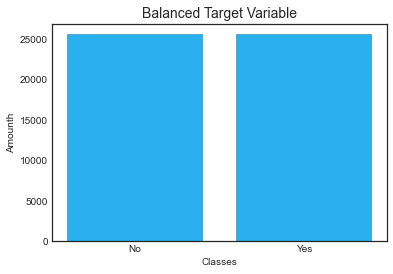

In [81]:
bank_add_dm = pd.get_dummies(bank_add_full, columns=['housing','loan','job','marital','education','contact','month','day_of_week', 'poutcome','default'])

X = bank_add_dm.drop(['y'], axis=1)
y = bank_add_dm.y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

smote = SMOTE(random_state=0)

X_res, y_res = smote.fit_resample(X_train, y_train)


plt.bar(['No','Yes'], [sum(y_res), len(y_res)-sum(y_res)], facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Balanced Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amounth')
plt.show()

AUC: 0.7996733148073564


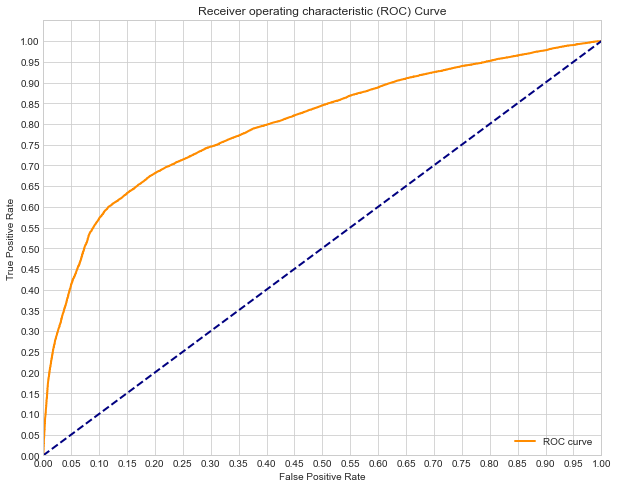

In [17]:
plt.style.use('seaborn-whitegrid')
logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)

#Probability scores for test set
y_score = logreg.fit(X_res, y_res).decision_function(X_res)
y_pred = logreg.fit(X_res, y_res).predict(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_res, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
def conf_matrix(cnf_matrix):
    '''
    Visualization function for confusion matrix
    '''
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) # Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.style.use('seaborn-white')
    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    
def plot_feature_importances(model):
    '''
    Visualization for future importance
    '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

              precision    recall  f1-score   support

           0       0.95      0.76      0.84     10969
           1       0.27      0.69      0.38      1388

    accuracy                           0.75     12357
   macro avg       0.61      0.72      0.61     12357
weighted avg       0.87      0.75      0.79     12357



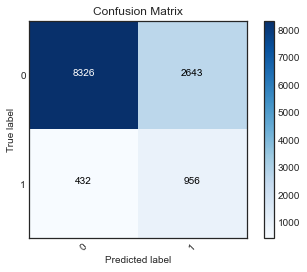

In [19]:
print(classification_report(y_test, y_pred))

plt.style.use('seaborn-white')
logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)
y_pred = logreg.fit(X_res, y_res).predict(X_test)
conf_matrix(confusion_matrix(y_test, y_pred))

In [20]:
logistic_regression = LogisticRegression(n_jobs=-1)
random_forest = RandomForestClassifier(n_jobs=-1)
adaboost = AdaBoostClassifier()
gboost = GradientBoostingClassifier()
xgboost = xgb.XGBClassifier(n_jobs=-1)
naive_bayes = GaussianNB()

classifiers = [logistic_regression, random_forest, xgboost, adaboost, gboost, naive_bayes]
classifiers_names = ['Logistic Regression', 'Random Forest','XGBoost', 'AdaBoost', 'Gradient Boost','Naive Bayes']

scores = []
for i in range(len(classifiers)):
    y_pred = classifiers[i].fit(X_train, y_train).predict(X_test)
    scores.append(round(f1_score(y_test, y_pred), 3))

pd.DataFrame({'Classifier': classifiers_names, 'F1-Score': scores}).sort_values('F1-Score', ascending=False)

[19:47:41] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Classifier,F1-Score
2,XGBoost,0.373
5,Naive Bayes,0.367
1,Random Forest,0.365
4,Gradient Boost,0.362
0,Logistic Regression,0.327
3,AdaBoost,0.327


In [21]:
scores = []
for i in range(len(classifiers)):
    y_pred = classifiers[i].fit(X_res, y_res).predict(X_test)
    scores.append(round(f1_score(y_test, y_pred), 3))

pd.DataFrame({'Classifier': classifiers_names, 'F1-Score': scores}).sort_values('F1-Score', ascending=False)

[19:48:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Classifier,F1-Score
4,Gradient Boost,0.485
3,AdaBoost,0.464
0,Logistic Regression,0.438
2,XGBoost,0.407
1,Random Forest,0.401
5,Naive Bayes,0.323


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     10969
           1       0.52      0.31      0.39      1388

    accuracy                           0.89     12357
   macro avg       0.72      0.64      0.66     12357
weighted avg       0.87      0.89      0.88     12357



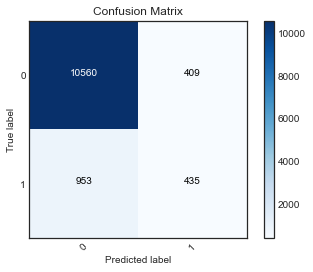

In [22]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [8, 10, 12],
    'subsample': [0.5]
}

grid = GridSearchCV(gboost, param_grid, n_jobs=-1)

grid.fit(X_res, y_res).best_params_


gboost = GradientBoostingClassifier(max_depth=12, n_estimators=100, subsample=0.5)
y_pred = gboost.fit(X_res, y_res).predict(X_test)

conf_matrix(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[20:04:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     36548
           1       0.72      0.45      0.55      4640

    accuracy                           0.92     41188
   macro avg       0.83      0.71      0.75     41188
weighted avg       0.91      0.92      0.91     41188



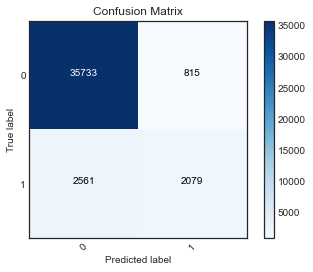

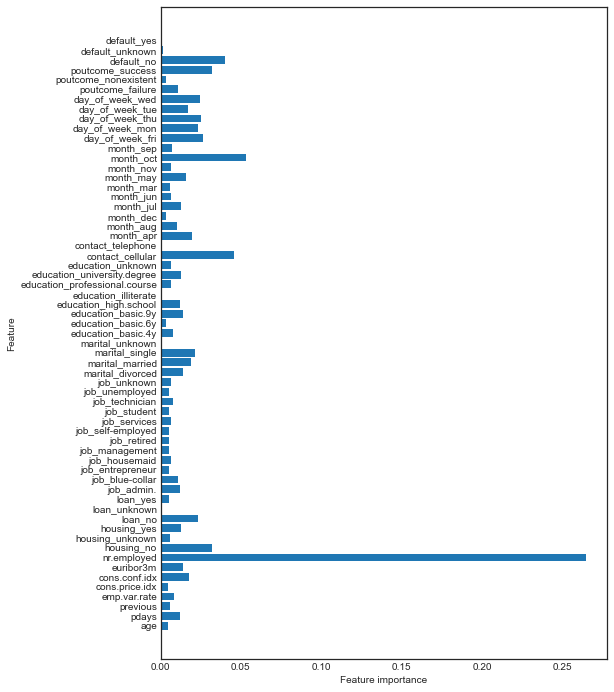

In [24]:
xgboost = xgb.XGBClassifier(max_depth=11, 
                            learning_rate=0.1, 
                            n_estimators=70, 
                            min_child_weight=3, 
                            subsample=0.7, 
                            n_jobs=-1)
y_pred = xgboost.fit(X_res, y_res).predict(X_scaled)

print(classification_report(y, y_pred))
conf_matrix(confusion_matrix(y, y_pred))
plot_feature_importances(xgboost)

In [25]:
cross_val_score(xgboost, X_scaled, y, cv=10).mean()

[20:04:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.36565457743825885

### SMOTE 안씀

In [26]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors

In [27]:
corr = bank_add_full.corr()

bank_add_dm = pd.get_dummies(bank_add_full, columns=['housing','loan','job','marital','education','contact','month','day_of_week', 'poutcome','default'])

X = bank_add_dm.drop(['y'], axis=1)
y = bank_add_dm.y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [47]:

def nearest_neighbour(X):
  nbs=NearestNeighbors(n_neighbors=3,metric='euclidean',algorithm='auto').fit(X)
  euclidean,indices= nbs.kneighbors(X)
  return indices

def SMOTE_100(X):
  indices2 = nearest_neighbour(X)
  matrix=[]
#store the values of t into an object and randomly select a value from the object and save it to a new list that will later be added to x1 training data
  for m in range(len(indices2)):
    t=x1[indices2[m]]
    newt=pd.DataFrame(t)
    matrix.append([])
    for j in range(len(newt.columns)):
      matrix[m].append(random.choice(newt[j]))
  return matrix

In [50]:
unique, counts = np.unique(y_train, return_counts=True)

minority_shape = dict(zip(unique, counts))[1]

X_train

x1 = np.ones((minority_shape, X_train.shape[1]))
x1=[X_train[i] for i, v in enumerate(y_train) if v==1]
x1=np.array(x1)


#3. Applying 100% SMOTE
sampled_instances = SMOTE_100(x1)
# Keeping the artificial instances and original instances together
X_TrainSMOTE = np.concatenate((X_train,sampled_instances), axis = 0)


y_sampled_instances = np.ones(minority_shape)
y_TrainSMOTE = np.concatenate((y_train,y_sampled_instances), axis=0)
#X_TrainSMOTE and y_TrainSMOTE are the Training Set Features and Labels respectively




In [60]:
import random
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from random import randrange

def get_neigbours(M, k):
    nn = NearestNeighbors(n_neighbors=k+1, metric="euclidean").fit(M)
    dist, indices = nn.kneighbors(M, return_distance=True)
    return dist, indices
def SMOTE(M, N, k=5):
    t = M.shape[0] # number of minority class samplesnumattrs = M.shape[1]
    N = int(N/100)
    _, indices = get_neigbours(M, k)
    synthetic = np.empty((N * t, M.shape[1]))
    synth_idx = 0
    for i in range(t):
        for j in range(N):
            neighbour = randrange(1, k+1)
            diff = M[indices[i, neighbour]] - M[i]
            gap = random.uniform(0, 1)
            synthetic[synth_idx] = M[i] + gap*diff
            synth_idx += 1
    return synthetic

In [73]:
sampled_instancesX1 = SMOTE(x1, 800)

X1_TrainSMOTE = np.concatenate((X_train,sampled_instancesX1), axis = 0)

y_sampled_instancesX1 = np.ones(minority_shape)
y1_TrainSMOTE = np.concatenate((y_train,y_sampled_instancesX1), axis=0)

In [77]:
pd.DataFrame(X1_TrainSMOTE)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.290186,0.195414,-0.349494,-1.197935,-1.179380,-1.231034,-1.322795,-0.940281,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-1.946613,1.947042,-0.008535
1,1.341116,0.195414,-0.349494,-2.216433,-1.977538,2.939106,-1.653164,-2.069683,-0.908418,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-1.946613,1.947042,-0.008535
2,0.861322,0.195414,-0.349494,0.648092,0.722722,0.886447,0.711883,0.331680,1.100814,-0.156933,...,-0.510465,-0.514581,2.022677,-0.496067,-0.33929,0.397706,-0.1857,-1.946613,1.947042,-0.008535
3,-0.961898,0.195414,-0.349494,0.648092,0.722722,0.886447,0.711883,0.331680,-0.908418,-0.156933,...,-0.510465,-0.514581,-0.494394,2.015858,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
4,-1.633611,0.195414,-0.349494,0.839061,1.536429,-0.280328,0.772422,0.845170,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54842,-1.033861,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.300886,-0.940281,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
54843,-1.057857,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.277311,-0.940281,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
54844,-1.043208,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.300886,-0.940281,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
54845,-1.057857,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.278578,-0.940281,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535


In [56]:
x1 = np.ones((minority_shape, X_train.shape[1]))
x1=[X_train[i] for i, v in enumerate(y_train) if v==1]
x1=np.array(x1)

x1


array([[-1.24977508,  0.1954139 , -0.34949428, ...,  0.51371278,
        -0.51359953, -0.00853476],
       [-0.38614459,  0.1954139 ,  3.69176641, ...,  0.51371278,
        -0.51359953, -0.00853476],
       [-0.09826775, -5.08524091,  3.69176641, ...,  0.51371278,
        -0.51359953, -0.00853476],
       ...,
       [-1.34573402, -5.11199195,  1.67113606, ...,  0.51371278,
        -0.51359953, -0.00853476],
       [-0.09826775,  0.1954139 ,  1.67113606, ...,  0.51371278,
        -0.51359953, -0.00853476],
       [-1.05785719,  0.1954139 , -0.34949428, ...,  0.51371278,
        -0.51359953, -0.00853476]])

In [75]:
print(y_train.value_counts())

print(pd.Series(y1_TrainSMOTE).value_counts())

len(x1)

0    25579
1     3252
Name: y, dtype: int64
0.0    25579
1.0     6504
dtype: int64


3252

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
minority_shape = dict(zip(unique, counts))[1]

x1 = np.ones((minority_shape, X_train.shape[0]))

X_train


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.290186,0.195414,-0.349494,-1.197935,-1.179380,-1.231034,-1.322795,-0.940281,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-1.946613,1.947042,-0.008535
1,1.341116,0.195414,-0.349494,-2.216433,-1.977538,2.939106,-1.653164,-2.069683,-0.908418,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-1.946613,1.947042,-0.008535
2,0.861322,0.195414,-0.349494,0.648092,0.722722,0.886447,0.711883,0.331680,1.100814,-0.156933,...,-0.510465,-0.514581,2.022677,-0.496067,-0.33929,0.397706,-0.1857,-1.946613,1.947042,-0.008535
3,-0.961898,0.195414,-0.349494,0.648092,0.722722,0.886447,0.711883,0.331680,-0.908418,-0.156933,...,-0.510465,-0.514581,-0.494394,2.015858,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
4,-1.633611,0.195414,-0.349494,0.839061,1.536429,-0.280328,0.772422,0.845170,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28826,1.149199,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.774728,0.845170,1.100814,-0.156933,...,-0.510465,-0.514581,-0.494394,2.015858,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
28827,1.533034,0.195414,-0.349494,-1.197935,-1.179380,-1.231034,-1.330867,-0.940281,1.100814,-0.156933,...,-0.510465,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
28828,-1.057857,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.300886,-0.940281,1.100814,-0.156933,...,-0.510465,1.943329,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535
28829,-0.482104,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170,-0.908418,-0.156933,...,1.959000,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,0.513713,-0.513600,-0.008535


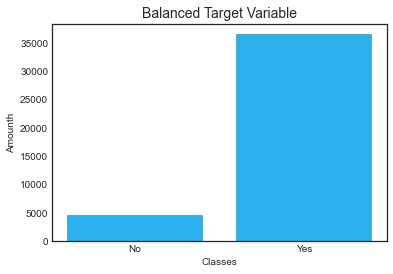

In [ ]:
plt.bar(['No','Yes'], [sum(bank_add_full.y), len(bank_add_full.y)-sum(bank_add_full.y)], facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Balanced Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amounth')
plt.show()

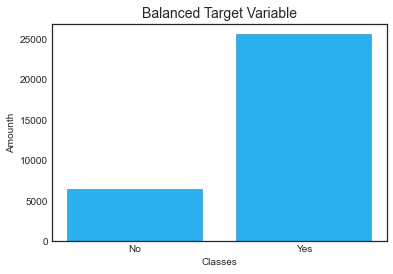

In [ ]:
plt.bar(['No','Yes'], [sum(y_TrainSMOTE), len(y_TrainSMOTE)-sum(y_TrainSMOTE)], facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Balanced Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amounth')
plt.show()